In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("/Users/uv/Desktop/deepLearning/Iris.csv")

In [3]:
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Independent features
y = iris.target  # Dependent feature (categorical output label)

# Convert categorical labels to one-hot encoding
y_one_hot = to_categorical(y)

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display shapes of processed data
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y_one_hot:", y_one_hot.shape)


Shape of X_scaled: (150, 4)
Shape of y_one_hot: (150, 3)


In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Independent features
y = iris.target  # Dependent feature (categorical output label)

# Convert categorical labels to one-hot encoding
y_one_hot = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes of processed data
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled: (120, 4)
Shape of X_test_scaled: (30, 4)
Shape of y_train: (120, 3)
Shape of y_test: (30, 3)


Epoch 1/200


/Users/uv/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 0s - 100ms/step - accuracy: 0.4583 - loss: 1.0416 - val_accuracy: 0.5667 - val_loss: 0.9805
Epoch 2/200
4/4 - 0s - 4ms/step - accuracy: 0.5750 - loss: 0.9732 - val_accuracy: 0.6667 - val_loss: 0.9178
Epoch 3/200
4/4 - 0s - 5ms/step - accuracy: 0.6917 - loss: 0.9177 - val_accuracy: 0.8333 - val_loss: 0.8634
Epoch 4/200
4/4 - 0s - 4ms/step - accuracy: 0.7917 - loss: 0.8641 - val_accuracy: 0.9000 - val_loss: 0.8120
Epoch 5/200
4/4 - 0s - 4ms/step - accuracy: 0.7833 - loss: 0.8232 - val_accuracy: 0.9000 - val_loss: 0.7620
Epoch 6/200
4/4 - 0s - 5ms/step - accuracy: 0.8000 - loss: 0.7723 - val_accuracy: 0.9333 - val_loss: 0.7127
Epoch 7/200
4/4 - 0s - 5ms/step - accuracy: 0.7917 - loss: 0.7340 - val_accuracy: 0.9333 - val_loss: 0.6617
Epoch 8/200
4/4 - 0s - 5ms/step - accuracy: 0.7750 - loss: 0.6785 - val_accuracy: 0.9000 - val_loss: 0.6132
Epoch 9/200
4/4 - 0s - 4ms/step - accuracy: 0.8000 - loss: 0.6435 - val_accuracy: 0.9000 - val_loss: 0.5681
Epoch 10/200
4/4 - 0s - 4ms/step - acc

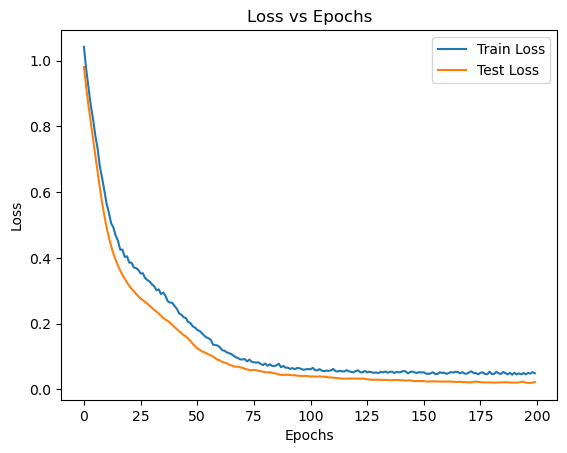

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Independent features
y = iris.target  # Dependent feature (categorical output label)

# Convert categorical labels to one-hot encoding
y_one_hot = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(16, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3217 - loss: 3.2543 - val_accuracy: 0.5000 - val_loss: 3.1830
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 3.1062 - val_accuracy: 0.6333 - val_loss: 3.0339
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6042 - loss: 2.9765 - val_accuracy: 0.7000 - val_loss: 2.9073
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 2.8840 - val_accuracy: 0.8667 - val_loss: 2.8041
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8192 - loss: 2.7941 - val_accuracy: 0.8667 - val_loss: 2.7210
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7552 - loss: 2.7395 - val_accuracy: 0.9000 - val_loss: 2.6555
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 2.6729 - val_accuracy: 0.9000 - val_loss: 2.5977
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 2.6298 - val_accuracy: 0.9000 - val_loss: 2.5434

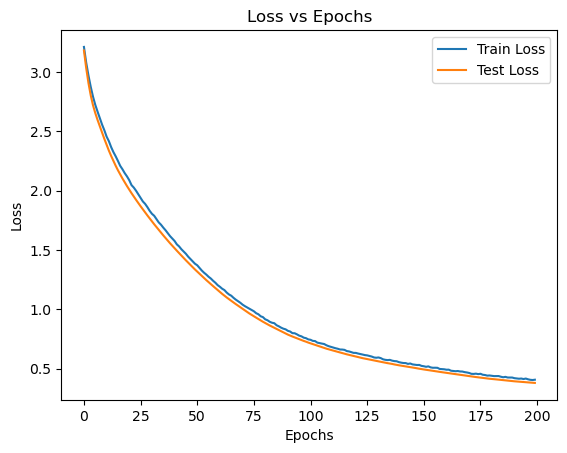

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt



# Model 1: L1 Regularization
model1 = Sequential([
    Dense(16, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(32, activation='tanh', kernel_regularizer=l1(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(y_train.shape[1], activation='softmax')
])
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=1)


loss, accuracy = model1.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()




Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0577 - loss: 1.6304 - val_accuracy: 0.3333 - val_loss: 1.5102
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4433 - loss: 1.5005 - val_accuracy: 0.6667 - val_loss: 1.3920
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6827 - loss: 1.3908 - val_accuracy: 0.7667 - val_loss: 1.2842
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7110 - loss: 1.2996 - val_accuracy: 0.8333 - val_loss: 1.1925
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7823 - loss: 1.2262 - val_accuracy: 0.9000 - val_loss: 1.1174
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 1.1367 - val_accuracy: 0.9000 - val_loss: 1.0567
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8163 - loss: 1.1039 - val_accuracy: 0.9000 - val_loss: 1.0085
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 1.0489 - val_accuracy: 0.9000 - val_loss: 0.9675

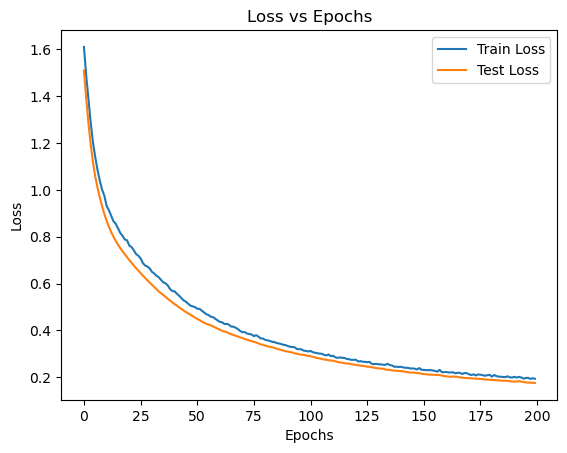

In [9]:
model2 = Sequential([
    Dense(16, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(32, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(y_train.shape[1], activation='softmax')
])
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=1)


loss, accuracy = model2.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1660 - loss: 1.2222 - val_accuracy: 0.1667 - val_loss: 1.1096
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2542 - loss: 1.1404 - val_accuracy: 0.3000 - val_loss: 1.0576
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2963 - loss: 1.1165 - val_accuracy: 0.3667 - val_loss: 1.0146
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3544 - loss: 1.0545 - val_accuracy: 0.3667 - val_loss: 0.9823
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3258 - loss: 1.0460 - val_accuracy: 0.4333 - val_loss: 0.9510
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3331 - loss: 1.0421 - val_accuracy: 0.6333 - val_loss: 0.9223
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4348 - loss: 0.9715 - val_accuracy: 0.7000 - val_loss: 0.8949
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4119 - loss: 0.9796 - val_accuracy: 0.7000 - val_loss: 0.8723

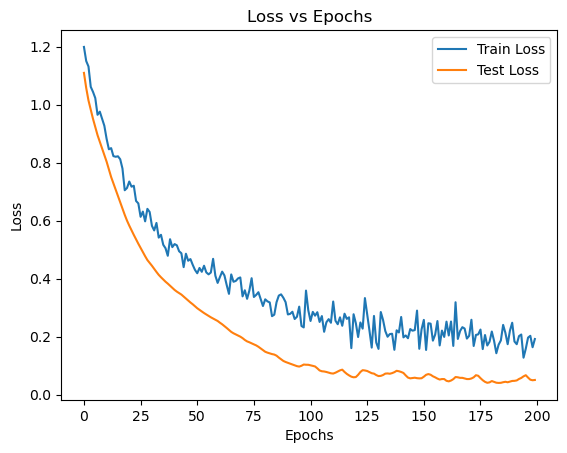

In [10]:
model3 = Sequential([
    Dense(8, activation='tanh', input_shape=(X_train.shape[1],)), 
    Dropout(0.2),
    Dense(16, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='tanh'),
    Dropout(0.2),
    Dense(8, activation='relu'), 
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=1)


loss, accuracy = model3.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

Randomly initialized weight (w_0): 1.1436
Randomly initialized bias (b_0): -0.5971


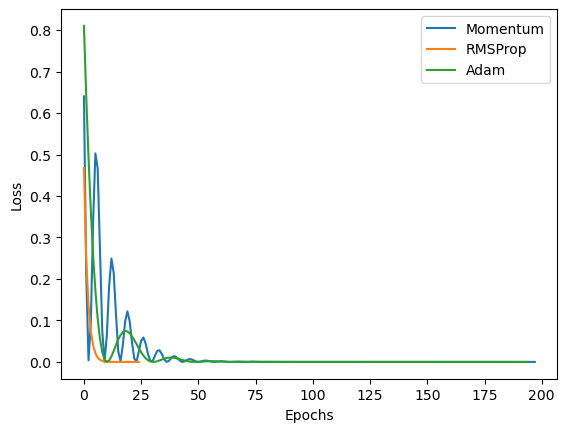

Momentum Converged in 198 iterations
RMSProp Converged in 25 iterations
Adam Converged in 195 iterations


In [19]:


# Randomly initialize weights and bias
w_0 = np.random.randn()
b_0 = np.random.randn()

print(f"Randomly initialized weight (w_0): {w_0:.4f}")
print(f"Randomly initialized bias (b_0): {b_0:.4f}")

import matplotlib.pyplot as plt

# Loss function and gradient
def loss(m):
    return m**2 - 2*m + 1

def gradient(m):
    return 2*m - 2

# Optimizer function
def optimize(method, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8):
    m, v, s, t = 0, 0, 0, 1
    history = []
    while True:
        grad = gradient(m) 
        if method == 'Momentum':
            v = beta1 * v + lr * grad
            new_m = m - v
        elif method == 'RMSProp':
            s = beta1 * s + (1 - beta1) * grad**2
            new_m = m - (lr / (np.sqrt(s) + eps)) * grad
        elif method == 'Adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad**2
            v_corr = v / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            new_m = m - (lr / (np.sqrt(s_corr) + eps)) * v_corr
        history.append(loss(new_m))
        if abs(new_m - m) < 1e-6:
            break
        m, t = new_m, t + 1
    return history, t

# Run optimizers
methods = ['Momentum', 'RMSProp', 'Adam']
results = {method: optimize(method) for method in methods}

# Plot results
plt.figure()
for method, (history, _) in results.items():
    plt.plot(history, label=method)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print iterations
for method, (_, iterations) in results.items():
    print(f"{method} Converged in {iterations} iterations")